# Sistema de Recomendación de peliculas

### Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### cargar datos

In [2]:
movies = pd.read_csv("D:\\Python\\movies.csv", header = None)
tags = pd.read_csv("D:\\Python\\tags.csv", header = None, low_memory = False)
links = pd.read_csv("D:\\Python\\links.csv", header = None)
ratings = pd.read_csv("D:\\Python\\ratings.csv", nrows = 2500055 ,header = None, low_memory = False)

### Lumpieza de datos

In [3]:
movies.columns = ["movieId", "title", "genres"]
movies  = movies.drop(0)

In [4]:
tags.columns = ["userid", "movieId", "tag", "timestamp"]
tags = tags.drop(0)

In [5]:
links.columns = ["movieId", "imdbID", "tmdbID"]
links = links.drop(0)

In [6]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
movies.dtypes

movieId    object
title      object
genres     object
dtype: object

In [8]:
movies["movieId"] = movies["movieId"].astype(int)

In [9]:
tags.isnull().sum()

userid        0
movieId       0
tag          17
timestamp     0
dtype: int64

In [10]:
tags.movieId = tags.movieId.astype(int)

In [11]:
tags.userid = tags.userid.astype(int)

In [12]:
tags.dtypes

userid        int32
movieId       int32
tag          object
timestamp    object
dtype: object

In [13]:
tags.timestamp

1          1583038886
2          1581476297
3          1622483469
4          1249808064
5          1249808102
              ...    
2000068    1320817734
2000069    1322337407
2000070    1322337400
2000071    1325828398
2000072    1373095449
Name: timestamp, Length: 2000072, dtype: object

In [14]:
tags["timestamp"] = pd.to_numeric(tags["timestamp"], errors="coerce")
tags["timestamp"] = pd.to_datetime(tags["timestamp"], unit="s")

In [15]:
tags = tags.dropna(subset = ["tag"])

In [16]:
tags.isnull().sum()

userid       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [17]:
links.dtypes

movieId    object
imdbID     object
tmdbID     object
dtype: object

In [18]:
links["movieId"] = links["movieId"].astype(int)

In [19]:
links["imdbID"] = links["imdbID"].astype(int)

In [20]:
links = links.dropna(subset = ["tmdbID"])

In [21]:
links["tmdbID"] = links["tmdbID"].astype(int)

In [22]:
tags.shape

(2000055, 4)

In [23]:
ratings

,0,1,2,3
0,userId,movieId,rating,timestamp
1,1,17,4.0,944249077
2,1,25,1.0,944250228
3,1,29,2.0,943230976
4,1,30,5.0,944249077
...,...,...,...,...
2500050,15875,527,4.0,1442418608
2500051,15875,529,4.0,1451497671
2500052,15875,531,3.0,1454005177
2500053,15875,532,2.5,1458556759


In [24]:
ratings.columns = ["userID", "movieId", "rating", "timestamp"] 

In [25]:
ratings = ratings.drop(0)

In [26]:
ratings.dtypes

userID       object
movieId      object
rating       object
timestamp    object
dtype: object

In [27]:
ratings["userID"] = ratings["userID"].astype(int)
ratings["movieId"] = ratings["movieId"].astype(int)
ratings["rating"] = ratings["rating"].astype(float)

In [28]:
ratings["timestamp"] = pd.to_numeric(ratings["timestamp"], errors="coerce")
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")

### Análisis exploratorio

In [29]:
df = pd.merge(ratings, movies, on = "movieId", how = "inner")

In [30]:
df

,userID,movieId,rating,timestamp,title,genres
0,1,17,4.0,1999-12-03 19:24:37,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,1999-12-03 19:43:48,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,1999-11-22 00:36:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,1999-12-03 19:24:37,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,1999-11-22 00:00:58,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...,...,...,...
2500049,15875,527,4.0,2015-09-16 15:50:08,Schindler's List (1993),Drama|War
2500050,15875,529,4.0,2015-12-30 17:47:51,Searching for Bobby Fischer (1993),Drama
2500051,15875,531,3.0,2016-01-28 18:19:37,"Secret Garden, The (1993)",Children|Drama
2500052,15875,532,2.5,2016-03-21 10:39:19,Serial Mom (1994),Comedy|Crime|Horror


In [31]:
df["title"].value_counts().head(10)

title
Shawshank Redemption, The (1994)                             8157
Forrest Gump (1994)                                          7892
Pulp Fiction (1994)                                          7753
Matrix, The (1999)                                           7377
Silence of the Lambs, The (1991)                             7135
Star Wars: Episode IV - A New Hope (1977)                    6744
Fight Club (1999)                                            6044
Jurassic Park (1993)                                         5988
Lord of the Rings: The Fellowship of the Ring, The (2001)    5806
Schindler's List (1993)                                      5741
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

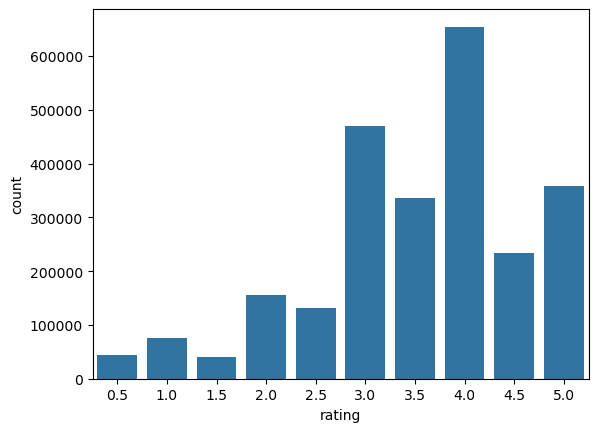

In [32]:
sns.countplot(x = df.rating)

In [33]:
df.isnull().sum()

userID       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [34]:
df.timestamp.max()

Timestamp('2023-10-13 00:38:42')

In [35]:
df.timestamp.min()

Timestamp('1996-02-28 07:14:37')

In [42]:
PeliculasPuntuadas = df.groupby("movieId").agg(conteo_rating = ("rating", "mean"))

In [43]:
PeliculasPuntuadas

,conteo_rating
movieId,
1,3.889164
2,3.303309
3,3.153696
4,2.850000
5,3.052094
...,...
292343,3.000000
292349,2.666667
292467,0.500000


<Axes: xlabel='conteo_rating', ylabel='Count'>

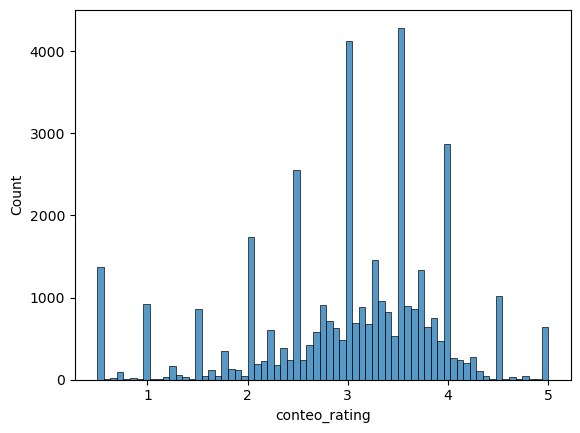

In [44]:
sns.histplot(PeliculasPuntuadas["conteo_rating"])

In [67]:
# Cuantas peronas vieron cada películas
peliculasxusuarios = df.groupby("movieId").agg(personas = ("userID", "count")).reset_index()

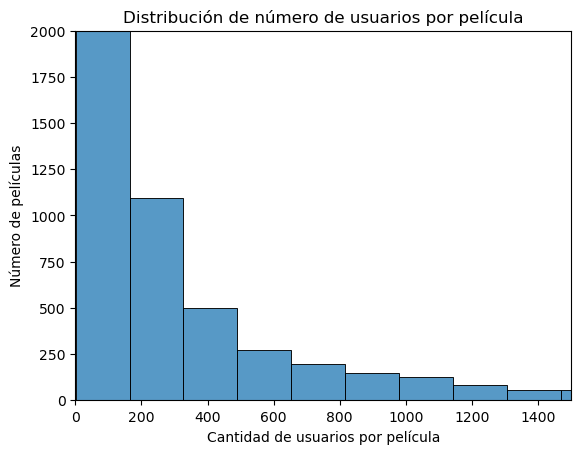

In [65]:
sns.histplot(peliculasxusuarios["personas"], bins=50, kde=False)
plt.xlabel("Cantidad de usuarios por película")
plt.ylabel("Número de películas")
plt.title("Distribución de número de usuarios por película")
plt.xlim(0, 1500)   
plt.ylim(0, 2000)   

plt.show()

In [68]:
peliculasxusuarios

,movieId,personas
0,1,5454
1,2,2176
2,3,1028
3,4,220
4,5,979
...,...,...
39673,292343,1
39674,292349,3
39675,292467,1
39676,292529,1


In [73]:
# Cuantas peliculas vió cada usuario
usuarioxpelicula = df.groupby("userID").agg(peliculas = ("movieId", "count")).reset_index()

In [74]:
usuarioxpelicula

,userID,peliculas
0,1,141
1,2,52
2,3,147
3,4,27
4,5,33
...,...,...
15870,15871,1232
15871,15872,481
15872,15873,38
15873,15874,167


(0.0, 1000.0)

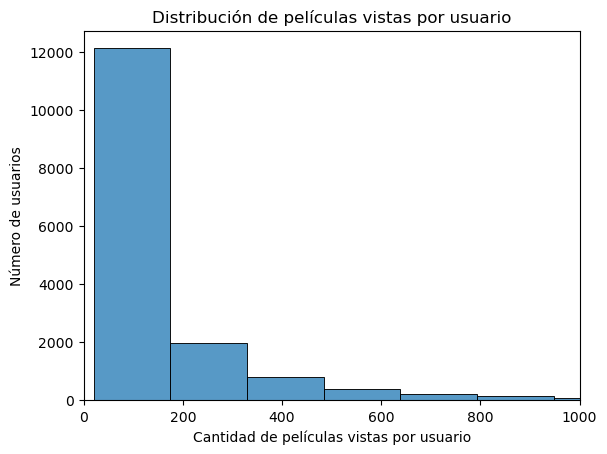

In [76]:
sns.histplot(usuarioxpelicula["peliculas"], bins=50, kde=False)
plt.xlabel("Cantidad de películas vistas por usuario")
plt.ylabel("Número de usuarios")
plt.title("Distribución de películas vistas por usuario")
plt.xlim(0, 1000)

In [81]:
ratings = df.pivot_table(
    values = "rating",
    index = "userID",
    columns = "movieId",
)
ratings.head()

MemoryError: Unable to allocate 4.69 GiB for an array with shape (15875, 39678) and data type float64

In [78]:
ratings

,userID,movieId,rating,timestamp,title,genres
0,1,17,4.0,1999-12-03 19:24:37,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,1999-12-03 19:43:48,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,1999-11-22 00:36:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,1999-12-03 19:24:37,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,1999-11-22 00:00:58,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
...,...,...,...,...,...,...
2500049,15875,527,4.0,2015-09-16 15:50:08,Schindler's List (1993),Drama|War
2500050,15875,529,4.0,2015-12-30 17:47:51,Searching for Bobby Fischer (1993),Drama
2500051,15875,531,3.0,2016-01-28 18:19:37,"Secret Garden, The (1993)",Children|Drama
2500052,15875,532,2.5,2016-03-21 10:39:19,Serial Mom (1994),Comedy|Crime|Horror
